In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from load_params import load_multigroup_params
from multi_group_dorm_simulation import MultiGroupDormSimulation

In [12]:
dorm_sim = MultiGroupDormSimulation(
            num_dorms=100,
            dorm_population=8000,
            non_dorm_population=26000,
            intra_dorm_contacts=10, # 10 contacts/day within each dorm
            inter_dorm_contacts=10, #10 contacts/day with other people in dorms
            intra_non_dorm_contacts=7.3, # each person in a dorm has this many contacts/day with person not in a dorm
            inter_non_dorm_contacts=3, #contacts/day within non-dorm community
            dorm_test_rate=0.5, # daily test rate within dorms
            non_dorm_test_rate=0.2, #daily test rate in non-dorm
            quarantine_contacts_multiplier=0.1, # multiply contacts/day rates by this after dorm is quarantined
            quarantine_test_fraction=1.0, # test fraction after dorm goes into quarantine
            dorm_outside_infection_p=0, # outside infection probability for people in dorms
            initial_dorm_prevalence = 0 # initial prevalence (percentage) in the dorms
)

In [19]:
import copy
cs = []
dorm_sims = []
for _ in range(5):
    sim = copy.deepcopy(dorm_sim)
    cs.append(sim.run_new_trajectory(50))
    dorm_sims.append(sim)
    print("done new trajectory")

done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory


In [7]:
sim.interaction_matrix[1,1]

0.1

In [8]:
dorm_sim.interaction_matrix[1,1]

10.0

In [11]:
sim.interaction_matrix[4,5]

10.1010101010101

In [9]:
sim.quarantined_dorms

{0,
 1,
 2,
 3,
 5,
 6,
 7,
 9,
 10,
 11,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 25,
 26,
 27,
 32,
 33,
 35,
 36,
 37,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 52,
 55,
 56,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 71,
 72,
 74,
 76,
 80,
 81,
 83,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 93,
 95,
 96,
 97,
 99}

In [18]:
sim.sims[-1].test_pop_fraction

0.2

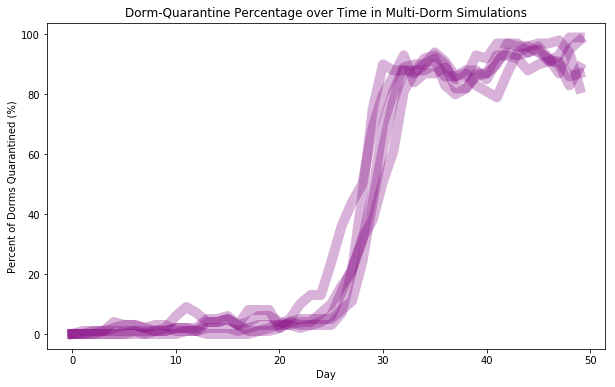

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
xs = list(range(50))
plt.figure(figsize=(10,6))
for c in cs:
    plt.plot(xs, c, color='purple', alpha=0.3, linewidth=10)
plt.xlabel("Day")
plt.ylabel("Percent of Dorms Quarantined (%)")
plt.title("Dorm-Quarantine Percentage over Time in Multi-Dorm Simulations")
plt.show()

In [21]:
dorm_sim = MultiGroupDormSimulation(
            num_dorms=100,
            dorm_population=8000,
            non_dorm_population=26000,
            intra_dorm_contacts=10, # 10 contacts/day within each dorm
            inter_dorm_contacts=10, #10 contacts/day with other people in dorms
            intra_non_dorm_contacts=7.3, # each person in a dorm has this many contacts/day with person not in a dorm
            inter_non_dorm_contacts=3, #contacts/day within non-dorm community
            dorm_test_rate=0.5, # daily test rate within dorms
            non_dorm_test_rate=0.2, #daily test rate in non-dorm
            quarantine_contacts_multiplier=0.1, # multiply contacts/day rates by this after dorm is quarantined
            quarantine_test_fraction=1.0, # test fraction after dorm goes into quarantine
            dorm_outside_infection_p=0, # outside infection probability for people in dorms
            safe_days_until_unquarantine=51,
            initial_dorm_prevalence = 0 # initial prevalence (percentage) in the dorms
)

In [22]:
import copy
cs = []
dorm_sims = []
for _ in range(5):
    sim = copy.deepcopy(dorm_sim)
    cs.append(sim.run_new_trajectory(50))
    dorm_sims.append(sim)
    print("done new trajectory")

done new trajectory
done new trajectory
done new trajectory


KeyboardInterrupt: 

Text(0.5,1,'Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine')

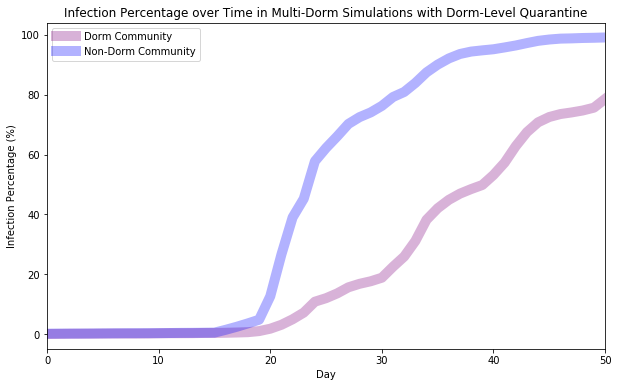

In [15]:
def get_popsize(df):
    cols = df.columns
    subdf = df[[col for col in cols if 'cumulative' not in col]]
    return subdf.sum(axis=1).iloc[0]

def infection_pct(df):
    popsize = get_popsize(df)
    
    subdf = df[['cumulative_mild', 'cumulative_severe']]
    infections = subdf.sum(axis=1).iloc[-1]
    
    return infections / popsize * 100

def add_df_plot(df, label, color, alpha=0.1, linewidth=10):
    popsize = get_popsize(df)
    df[['S', 'QS']].apply(lambda x: (popsize - sum(x)) / popsize * 100, axis=1) \
                        .plot(label=label, alpha=alpha, linewidth=linewidth, color=color)
        
import numpy as np
plt.figure(figsize=(10,6))
dorm_label='Dorm Community'
non_dorm_label = 'Non-Dorm Community'
for sim in dorm_sims:
    dorm_df = sim.sims[0].sim_df
    for i in range(1,100):
        dorm_df = dorm_df.add(sim.sims[i].sim_df)
    add_df_plot(dorm_df, label=dorm_label, color='purple', alpha=0.3, linewidth=10)
    add_df_plot(sim.sims[100].sim_df, label=non_dorm_label, color='blue', alpha=0.3, linewidth=10)
    dorm_label=''
    non_dorm_label=''
plt.xlabel("Day")
plt.ylabel("Infection Percentage (%)")
plt.legend()
plt.title("Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine")

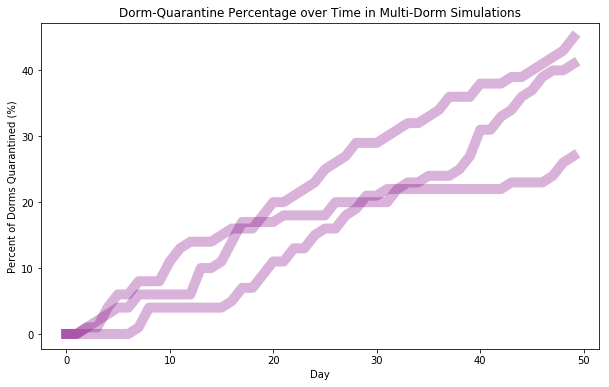

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
xs = list(range(50))
plt.figure(figsize=(10,6))
for c in cs:
    plt.plot(xs, c, color='purple', alpha=0.3, linewidth=10)
plt.xlabel("Day")
plt.ylabel("Percent of Dorms Quarantined (%)")
plt.title("Dorm-Quarantine Percentage over Time in Multi-Dorm Simulations")
plt.show()

Text(0.5,1,'Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine')

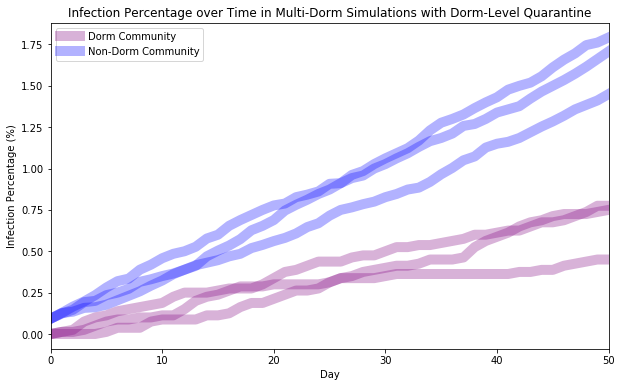

In [24]:
def get_popsize(df):
    cols = df.columns
    subdf = df[[col for col in cols if 'cumulative' not in col]]
    return subdf.sum(axis=1).iloc[0]

def infection_pct(df):
    popsize = get_popsize(df)
    
    subdf = df[['cumulative_mild', 'cumulative_severe']]
    infections = subdf.sum(axis=1).iloc[-1]
    
    return infections / popsize * 100

def add_df_plot(df, label, color, alpha=0.1, linewidth=10):
    popsize = get_popsize(df)
    df[['S', 'QS']].apply(lambda x: (popsize - sum(x)) / popsize * 100, axis=1) \
                        .plot(label=label, alpha=alpha, linewidth=linewidth, color=color)
        
import numpy as np
plt.figure(figsize=(10,6))
dorm_label='Dorm Community'
non_dorm_label = 'Non-Dorm Community'
for sim in dorm_sims:
    dorm_df = sim.sims[0].sim_df
    for i in range(1,100):
        dorm_df = dorm_df.add(sim.sims[i].sim_df)
    add_df_plot(dorm_df, label=dorm_label, color='purple', alpha=0.3, linewidth=10)
    add_df_plot(sim.sims[100].sim_df, label=non_dorm_label, color='blue', alpha=0.3, linewidth=10)
    dorm_label=''
    non_dorm_label=''
plt.xlabel("Day")
plt.ylabel("Infection Percentage (%)")
plt.legend()
plt.title("Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine")

In [16]:
df1 = sim.sims[0].sim_df
df2 = sim.sims[0].sim_df

In [17]:
df1.head()

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_13,SyID_severe_14,SyID_severe_15,SyID_severe_16,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections
0,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df2.head()

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_13,SyID_severe_14,SyID_severe_15,SyID_severe_16,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections
0,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df1.add(df2)

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_13,SyID_severe_14,SyID_severe_15,SyID_severe_16,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections
0,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df1.head()

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_13,SyID_severe_14,SyID_severe_15,SyID_severe_16,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections
0,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
0 == None

False

In [12]:
dorm_sim.interaction_matrix[200,199]

IndexError: index 200 is out of bounds for axis 0 with size 101

In [13]:
dorm_sim.sims[0].pop_size

80

In [18]:
dorm_sim.interaction_matrix[0,:]

array([10.       ,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010101,
        0.1010101,  0.1010101,  0.1010101,  0.1010101,  0.1010

In [31]:
dorm_sim = MultiGroupDormSimulation(
            num_dorms=100,
            dorm_population=8000,
            non_dorm_population=26000,
            intra_dorm_contacts=10, # 10 contacts/day within each dorm
            inter_dorm_contacts=10, #10 contacts/day with other people in dorms
            intra_non_dorm_contacts=7.3, # each person in a dorm has this many contacts/day with person not in a dorm
            inter_non_dorm_contacts=3, #contacts/day within non-dorm community
            dorm_test_rate=0.5, # daily test rate within dorms
            non_dorm_test_rate=0.2, #daily test rate in non-dorm
            quarantine_leakage_contacts_dorm=1.0, # dorm > different dorm contacts/day after dorm is quarantined
            quarantine_leakage_contacts_non_dorm=0.1, # dorm -> non-dorm contacts/day after dorm is quarantined
            quarantine_test_fraction=0.8, # test fraction after dorm goes into quarantine
            dorm_outside_infection_p=0, # outside infection probability for people in dorms
            initial_dorm_prevalence = 0 # initial prevalence (percentage) in the dorms
)

In [32]:
import copy
cs = []
dorm_sims = []
for _ in range(5):
    sim = copy.deepcopy(dorm_sim)
    cs.append(sim.run_new_trajectory(50))
    dorm_sims.append(sim)
    print("done new trajectory")

done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory


Text(0.5,1,'Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine')

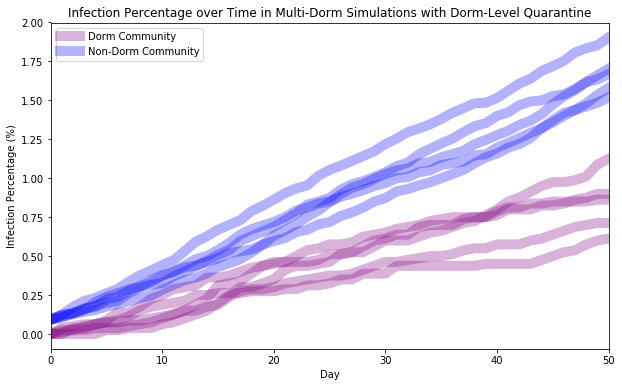

In [33]:
plt.figure(figsize=(10,6))
dorm_label='Dorm Community'
non_dorm_label = 'Non-Dorm Community'
for sim in dorm_sims:
    dorm_df = sim.sims[0].sim_df
    for i in range(1,100):
        dorm_df = dorm_df.add(sim.sims[i].sim_df)
    add_df_plot(dorm_df, label=dorm_label, color='purple', alpha=0.3, linewidth=10)
    add_df_plot(sim.sims[100].sim_df, label=non_dorm_label, color='blue', alpha=0.3, linewidth=10)
    dorm_label=''
    non_dorm_label=''
plt.xlabel("Day")
plt.ylabel("Infection Percentage (%)")
plt.legend()
plt.title("Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine")

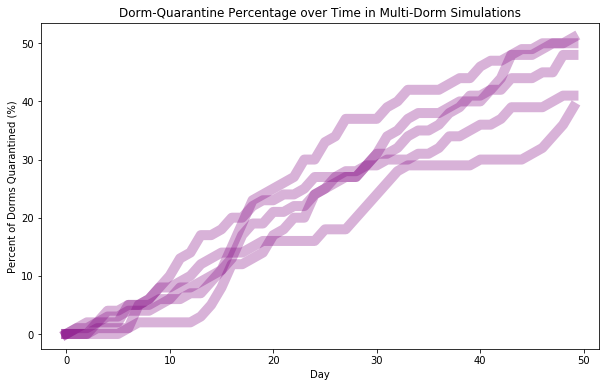

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
xs = list(range(50))
plt.figure(figsize=(10,6))
for c in cs:
    plt.plot(xs, c, color='purple', alpha=0.3, linewidth=10)
plt.xlabel("Day")
plt.ylabel("Percent of Dorms Quarantined (%)")
plt.title("Dorm-Quarantine Percentage over Time in Multi-Dorm Simulations")
plt.show()

# what about without any quarantine

In [35]:
dorm_sim = MultiGroupDormSimulation(
            num_dorms=100,
            dorm_population=8000,
            non_dorm_population=26000,
            intra_dorm_contacts=10, # 10 contacts/day within each dorm
            inter_dorm_contacts=10, #10 contacts/day with other people in dorms
            intra_non_dorm_contacts=7.3, # each person in a dorm has this many contacts/day with person not in a dorm
            inter_non_dorm_contacts=3, #contacts/day within non-dorm community
            dorm_test_rate=0.5, # daily test rate within dorms
            non_dorm_test_rate=0.2, #daily test rate in non-dorm
            quarantine_leakage_contacts_dorm=1.0, # dorm > different dorm contacts/day after dorm is quarantined
            quarantine_leakage_contacts_non_dorm=0.1, # dorm -> non-dorm contacts/day after dorm is quarantined
            quarantine_test_fraction=0.8, # test fraction after dorm goes into quarantine
            dorm_outside_infection_p=0, # outside infection probability for people in dorms
            initial_dorm_prevalence = 0 # initial prevalence (percentage) in the dorms
)

import copy
dorm_sims = []
for _ in range(5):
    sim = copy.deepcopy(dorm_sim)
    for _ in range(50):
        sim.step()
    dorm_sims.append(sim)
    print("done new trajectory")

done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory


Text(0.5,1,'Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine')

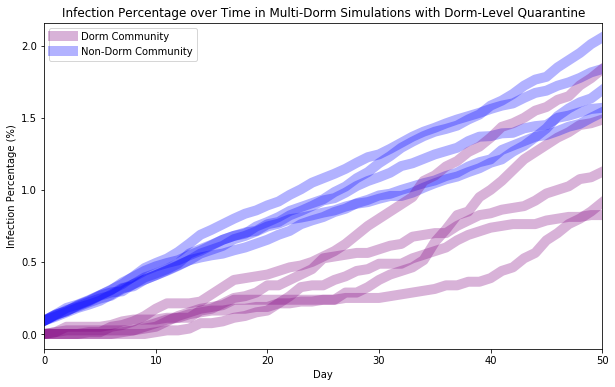

In [36]:
plt.figure(figsize=(10,6))
dorm_label='Dorm Community'
non_dorm_label = 'Non-Dorm Community'
for sim in dorm_sims:
    dorm_df = sim.sims[0].sim_df
    for i in range(1,100):
        dorm_df = dorm_df.add(sim.sims[i].sim_df)
    add_df_plot(dorm_df, label=dorm_label, color='purple', alpha=0.3, linewidth=10)
    add_df_plot(sim.sims[100].sim_df, label=non_dorm_label, color='blue', alpha=0.3, linewidth=10)
    dorm_label=''
    non_dorm_label=''
plt.xlabel("Day")
plt.ylabel("Infection Percentage (%)")
plt.legend()
plt.title("Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine")

# effect of quarantine w/ higher rate of contact

In [37]:
dorm_sim = MultiGroupDormSimulation(
            num_dorms=100,
            dorm_population=8000,
            non_dorm_population=26000,
            intra_dorm_contacts=10, # 10 contacts/day within each dorm
            inter_dorm_contacts=10, #10 contacts/day with other people in dorms
            intra_non_dorm_contacts=7.3, # each person in a dorm has this many contacts/day with person not in a dorm
            inter_non_dorm_contacts=8, #contacts/day within non-dorm community
            dorm_test_rate=0.5, # daily test rate within dorms
            non_dorm_test_rate=0.2, #daily test rate in non-dorm
            quarantine_leakage_contacts_dorm=1.0, # dorm > different dorm contacts/day after dorm is quarantined
            quarantine_leakage_contacts_non_dorm=0.1, # dorm -> non-dorm contacts/day after dorm is quarantined
            quarantine_test_fraction=0.8, # test fraction after dorm goes into quarantine
            dorm_outside_infection_p=0, # outside infection probability for people in dorms
            initial_dorm_prevalence = 0 # initial prevalence (percentage) in the dorms
)

import copy
dorm_sims = []
for _ in range(5):
    sim = copy.deepcopy(dorm_sim)
    for _ in range(50):
        sim.step()
    dorm_sims.append(sim)
    print("done new trajectory")

done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory


Text(0.5,1,'Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine')

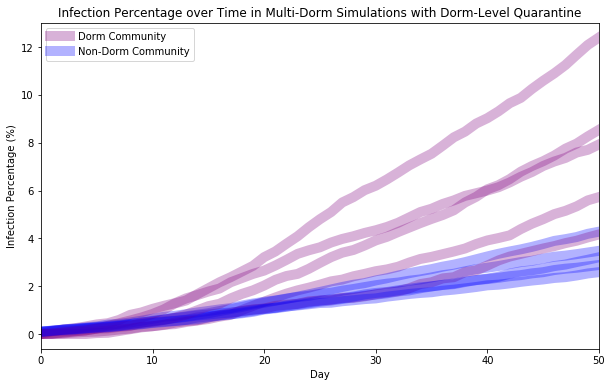

In [39]:
plt.figure(figsize=(10,6))
dorm_label='Dorm Community'
non_dorm_label = 'Non-Dorm Community'
for sim in dorm_sims:
    dorm_df = sim.sims[0].sim_df
    for i in range(1,100):
        dorm_df = dorm_df.add(sim.sims[i].sim_df)
    add_df_plot(dorm_df, label=dorm_label, color='purple', alpha=0.3, linewidth=10)
    add_df_plot(sim.sims[100].sim_df, label=non_dorm_label, color='blue', alpha=0.3, linewidth=10)
    dorm_label=''
    non_dorm_label=''
plt.xlabel("Day")
plt.ylabel("Infection Percentage (%)")
plt.legend()
plt.title("Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine")

In [40]:
dorm_sim = MultiGroupDormSimulation(
            num_dorms=100,
            dorm_population=8000,
            non_dorm_population=26000,
            intra_dorm_contacts=10, # 10 contacts/day within each dorm
            inter_dorm_contacts=10, #10 contacts/day with other people in dorms
            intra_non_dorm_contacts=7.3, # each person in a dorm has this many contacts/day with person not in a dorm
            inter_non_dorm_contacts=8, #contacts/day within non-dorm community
            dorm_test_rate=0.5, # daily test rate within dorms
            non_dorm_test_rate=0.2, #daily test rate in non-dorm
            quarantine_leakage_contacts_dorm=1.0, # dorm > different dorm contacts/day after dorm is quarantined
            quarantine_leakage_contacts_non_dorm=0.1, # dorm -> non-dorm contacts/day after dorm is quarantined
            quarantine_test_fraction=0.8, # test fraction after dorm goes into quarantine
            dorm_outside_infection_p=0, # outside infection probability for people in dorms
            initial_dorm_prevalence = 0 # initial prevalence (percentage) in the dorms
)

import copy
dorm_sims = []
for _ in range(5):
    sim = copy.deepcopy(dorm_sim)
    cs.append(sim.run_new_trajectory(50))
    dorm_sims.append(sim)
    print("done new trajectory")

done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory


Text(0.5,1,'Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine')

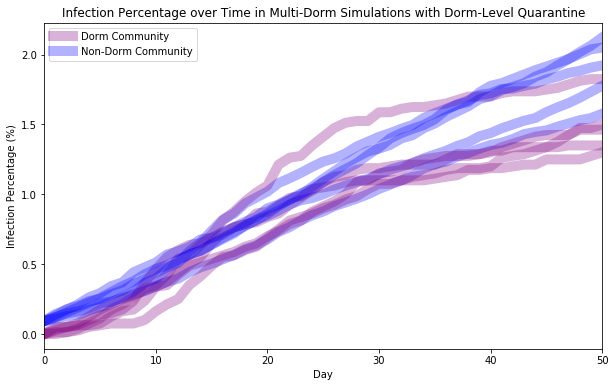

In [41]:
plt.figure(figsize=(10,6))
dorm_label='Dorm Community'
non_dorm_label = 'Non-Dorm Community'
for sim in dorm_sims:
    dorm_df = sim.sims[0].sim_df
    for i in range(1,100):
        dorm_df = dorm_df.add(sim.sims[i].sim_df)
    add_df_plot(dorm_df, label=dorm_label, color='purple', alpha=0.3, linewidth=10)
    add_df_plot(sim.sims[100].sim_df, label=non_dorm_label, color='blue', alpha=0.3, linewidth=10)
    dorm_label=''
    non_dorm_label=''
plt.xlabel("Day")
plt.ylabel("Infection Percentage (%)")
plt.legend()
plt.title("Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine")

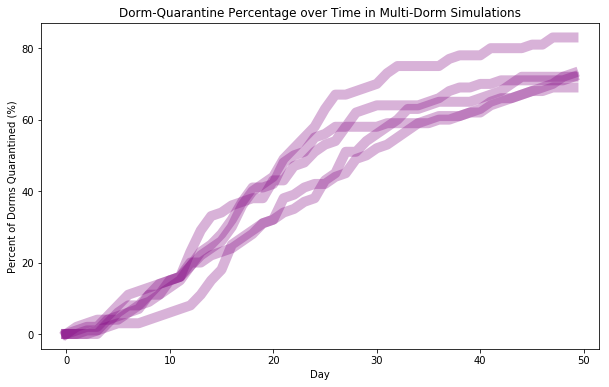

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
xs = list(range(50))
plt.figure(figsize=(10,6))
for c in cs[-5:]:
    plt.plot(xs, c, color='purple', alpha=0.3, linewidth=10)
plt.xlabel("Day")
plt.ylabel("Percent of Dorms Quarantined (%)")
plt.title("Dorm-Quarantine Percentage over Time in Multi-Dorm Simulations")
plt.show()